## Simple Linear Regression Template

In [1]:
# import random
# import numpy as np                                                            #using numpy library 


# def generate_regression_dataset(n, m, sigma=0, random_state=None):             # the required fucntion is named as generate_regression_dataset which takes n,m signma, random_state as input 
#     if random_state is not None:
#         random.seed(random_state)
#     X = np.random.rand(n, m)                                                  # generate a numpy 2d arary where each element in the array is a random number between 0 and 1.
#     ones = np.ones((n, 1))
#     X = np.hstack((ones, X))                                                  # horizantally stack the two arrays
#     beta = np.random.rand(m+1, 1)
#     Y = np.dot(X, beta)                                                        #matrix multiplication
#     Y += np.random.normal(scale=sigma, size=Y.shape)                           #noise
#     return X, Y, beta
# X,Y,beta=generate_regression_dataset(n=7,m=5,sigma=4,random_state=80)
# X,Y,beta


(array([[1.        , 0.75768432, 0.26546353, 0.35361394, 0.33694446,
         0.69838472],
        [1.        , 0.73789942, 0.14955718, 0.31242434, 0.69418581,
         0.06264589],
        [1.        , 0.03858776, 0.41591408, 0.08767033, 0.87410936,
         0.06320798],
        [1.        , 0.23883329, 0.06701245, 0.05043816, 0.05788153,
         0.95974373],
        [1.        , 0.88646386, 0.03822445, 0.32075943, 0.66557543,
         0.03655127],
        [1.        , 0.42598549, 0.4392168 , 0.71084186, 0.20902216,
         0.9706129 ],
        [1.        , 0.08596399, 0.10840961, 0.59755104, 0.6565628 ,
         0.31014255]]),
 array([[ 3.87555299],
        [11.55505424],
        [ 3.94386439],
        [ 4.05031741],
        [-6.67321109],
        [ 0.2687462 ],
        [-2.09059938]]),
 array([[0.50035013],
        [0.19219174],
        [0.65111115],
        [0.55614213],
        [0.15184768],
        [0.71807859]]))

# why we are using simple linear reg: coz its a continous values based dataset

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# t just means that any graph which we are creating as a part of our code will appear in the same notebook and not in separate window which would
%matplotlib inline

In [12]:
#reading the dataset

## 1. CHANGE THE PATH FOR NEW DATASET
PATH="./dataset/output.csv"

df=pd.read_csv(PATH)

df.head() #Return the first n rows. This function returns the first n rows for the object based on position. I


,Height,Weight
0,568439,5666
1,2261304,53913788
2,612,278
3,433860952,81
4,46377115,3


### raw visulalitaion

Text(0.5, 1.0, 'raw graph')

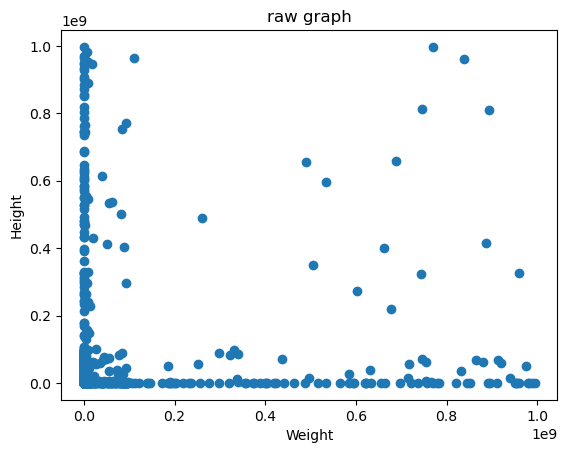

In [16]:

# dividing the axis
plt.scatter(df['Weight'],df['Height'])
plt.xlabel("Weight") #it is used for labeling the axis's
plt.ylabel("Height")
plt.title("raw graph") # it is used for labeling the chart

In [17]:
###df.isnull().sum()

Height    0
Weight    0
dtype: int64

### 3. divide our dataset into indpendent and dependent features





In [26]:
X = df[['Weight']] ## independent feature
y = df['Height']  ## dependent feature

X.head(),y.head()


(     Weight
 0      5666
 1  53913788
 2       278
 3        81
 4         3,
 0       568439
 1      2261304
 2          612
 3    433860952
 4     46377115
 Name: Height, dtype: int64)

### 4.further divide the dataset into train test split

In [21]:
from sklearn.model_selection import train_test_split


In [22]:
## it returns 4 varialbles  X_train,X_test,y_train,y_test
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.40,
    random_state=5)

In [28]:
X_train.shape,X_test.shape

((720, 1), (480, 1))

In [29]:
y_train.shape,y_test.shape

((720,), (480,))

In [30]:
### 5.standard scalling on the train test data
### why do we do that? coz to let convergence algo work fast and to standardise the 
### value in the same things

<AxesSubplot: >

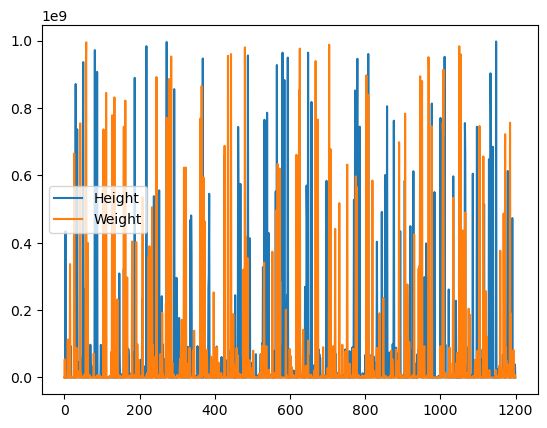

In [48]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

# always fit transform the train data and test data only for transform
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

X_train.shape,X_test.shape




### model training 

In [49]:
from sklearn.linear_model import LinearRegression

regressor = LinearRegression()

##training the tran data
regressor.fit(X_train,y_train)

LinearRegression()

In [51]:
regressor.intercept_,regressor.coef_

(63156991.3375, array([18919170.27867332]))

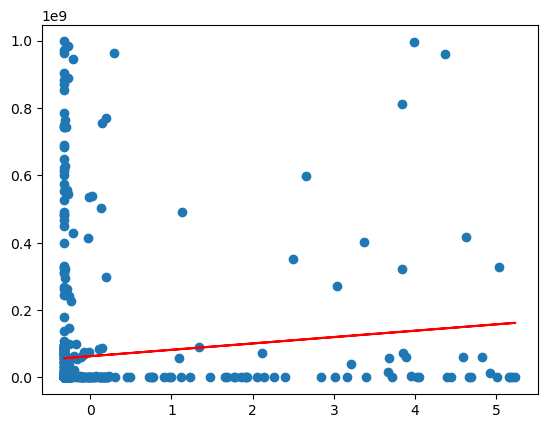

In [55]:
plt.scatter(X_train,y_train)
# plt.scatter(X_train,regressor.predict(X_train))
# ((x,Y^))
plt.plot(X_train,regressor.predict(X_train),'r')

In [56]:
#Prediction for the test data

y_pred_test = regressor.predict(X_test)

y_pred_test

array([5.71778929e+07, 5.71773349e+07, 6.69465313e+07, 6.75169492e+07,
       5.71773099e+07, 5.71860878e+07, 5.71790140e+07, 5.71776112e+07,
       5.71777900e+07, 7.52847451e+07, 1.08958282e+08, 5.72376948e+07,
       5.72371461e+07, 5.79691254e+07, 1.24196197e+08, 5.81280659e+07,
       6.66828409e+07, 5.71822613e+07, 5.71773145e+07, 5.71783164e+07,
       5.80647264e+07, 5.71773105e+07, 5.71950213e+07, 5.71773112e+07,
       5.71773158e+07, 5.71773100e+07, 5.71781064e+07, 5.71844383e+07,
       5.81981221e+07, 5.71773095e+07, 6.50995474e+07, 5.71773096e+07,
       5.71775252e+07, 5.71773181e+07, 5.71773103e+07, 5.72203628e+07,
       5.72630237e+07, 5.71773859e+07, 5.71773858e+07, 5.71949801e+07,
       6.65176722e+07, 5.71773105e+07, 5.71773786e+07, 5.72513928e+07,
       5.72147103e+07, 5.71803502e+07, 5.71773146e+07, 5.71773145e+07,
       5.71773117e+07, 5.77356130e+07, 5.71773932e+07, 5.71779817e+07,
       5.71773100e+07, 5.71773100e+07, 8.87912895e+07, 5.71779045e+07,
      

In [57]:
y_test

984     550170129
887        784133
11       44799663
235             9
596      75159706
          ...    
1094     25138115
172            78
288           943
591     156885785
699             8
Name: Height, Length: 480, dtype: int64

### 6. using the perfomance matrix for the accuracy measurement



In [58]:
from sklearn.metrics import mean_squared_error,mean_absolute_error

mse = mean_squared_error(y_test,y_pred_test)
mae = mean_absolute_error(y_test,y_pred_test)
rmse = np.sqrt(mse)

print(mse)
print(mae)
print(rmse)



3.0362979556038684e+16
94683698.87194891
174249761.997079


### Accuracy of the model is calculted by r square error or r mean squared error




In [59]:
from sklearn.metrics import r2_score

score = r2_score(y_test,y_pred_test)


# /*Dumb model prediction based*/
score

-0.005419373976749853